In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import lxml
import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# All OLS




In [2]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_regression.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,3 Month Total Return,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,2.499631,Materials,-0.170865,-0.392700,-0.378055,-1.454924,3.000,-0.372481,0.469207,-1,-1.004420,-0.795818,-0.380688,-0.747049,1.389797
1,AVY.N,2013-04-01,1.247607,Materials,-0.235084,-0.385490,-0.380857,-1.454924,3.000,-0.314283,1.410685,-1,-0.944876,-0.817719,-0.367655,-0.338211,1.278991
2,AVY.N,2013-07-01,0.726582,Materials,-0.255193,-0.385908,-0.376364,-1.317440,2.875,-0.299006,-0.275801,-1,-0.904454,-0.835560,0.931854,-0.346387,1.112782
3,AVY.N,2013-10-01,2.207725,Materials,-0.205410,-0.385784,-0.380352,-1.454924,2.875,-0.332867,-0.100077,-1,-1.183607,-0.835381,0.655696,-0.725244,0.946572
4,AVY.N,2014-01-01,0.904623,Materials,-0.187991,-0.380857,-0.373706,-1.317440,2.625,-0.333923,0.843142,-1,-1.194955,-0.834965,0.952897,-0.398173,0.798831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,POOL.OQ,2021-10-01,2.901092,Retailing,-0.202958,-0.278490,-0.388214,-1.317440,2.300,1.525227,-0.629509,-1,0.308492,-0.820667,-0.089760,-1.300343,-0.567779
18605,POOL.OQ,2022-01-01,3.720063,Retailing,-0.185330,-0.235483,-0.419838,-1.317440,2.300,1.163772,1.852531,-1,0.927196,-0.499303,-0.111148,-1.853637,-0.789391
18606,POOL.OQ,2022-04-01,3.565072,Retailing,-0.048679,-0.282188,-0.388113,-1.179957,2.300,1.011830,-2.025245,-1,0.783834,0.413058,1.332205,-2.284280,-0.900197
18607,POOL.OQ,2022-07-01,0.917490,Retailing,-0.170880,-0.305930,-0.334002,-1.179957,2.000,1.805131,-1.781424,-1,0.745658,1.881451,0.418886,-2.428736,-0.918665


#### OLS Regression

# Rescaling the variables

C:\Users\alexa\AppData\Local\Temp\ipykernel_21220\2881485660.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_cm.corr()


<AxesSubplot: >

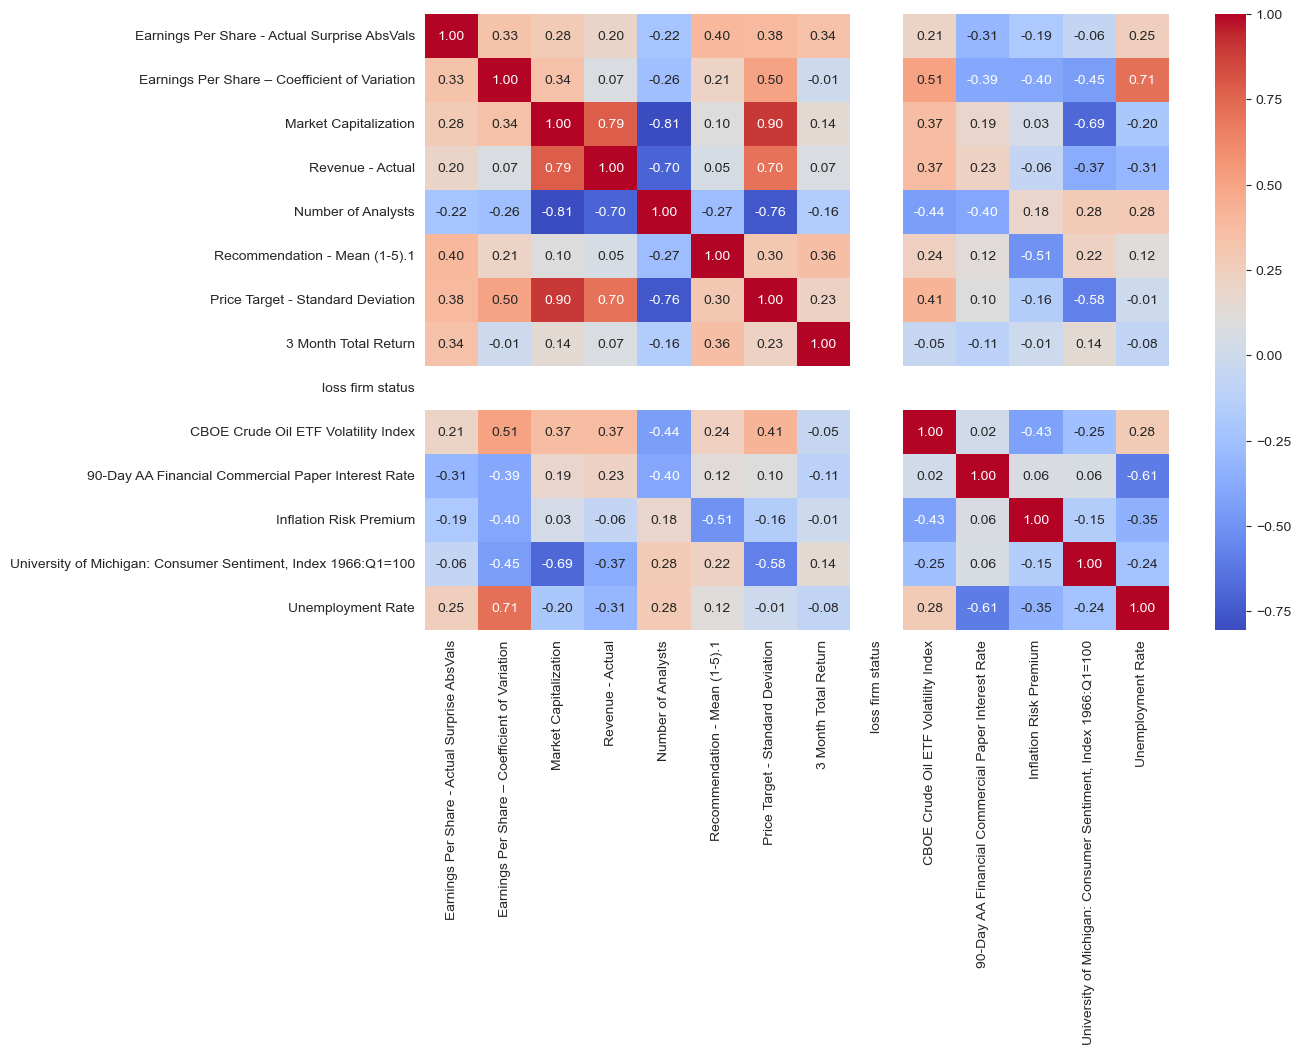

In [3]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_cm = df[df['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


corr_matrix = for_cm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [4]:
rescale = df.dropna()
y = rescale["Earnings Per Share - Actual Surprise AbsVals"]
#X = df_accuracy_new[['Revenue - Actual', 'Net Income after Tax']]
X = rescale.iloc[:, 4:]
#X = rescale[X_var_names]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Earnings Per Share - Actual Surprise AbsVals   R-squared:                       0.133
Model:                                                      OLS   Adj. R-squared:                  0.133
Method:                                           Least Squares   F-statistic:                     207.9
Date:                                          Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                                                  15:20:50   Log-Likelihood:                -25290.
No. Observations:                                         17595   AIC:                         5.061e+04
Df Residuals:                                             17581   BIC:                         5.072e+04
Df Model:                                                    13                                         
Covariance Type:                                      nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             2.1919      0.052     42.490      0.000       2.091       2.293
Earnings Per Share – Coefficient of Variation                     0.3339      0.008     42.416      0.000       0.318       0.349
Market Capitalization                                             0.0315      0.010      3.103      0.002       0.012       0.051
Revenue - Actual                                                 -0.0032      0.009     -0.338      0.735      -0.022       0.015
Number of Analysts                                               -0.0908      0.008    -10.875      0.000      -0.107      -0.074
Recommendation - Mean (1-5).1                                     0.0092      0.021      0.438      0.661      -0.032       0.050
Price Target - Standard Deviation                                 0.0265      0.008      3.414      0.001       0.011       0.042
3 Month Total Return                                              0.0830      0.008      9.984      0.000       0.067       0.099
loss firm status                                                  0.1732      0.018      9.621      0.000       0.138       0.208
CBOE Crude Oil ETF Volatility Index                               0.0153      0.009      1.624      0.104      -0.003       0.034
90-Day AA Financial Commercial Paper Interest Rate               -0.0170      0.010     -1.650      0.099      -0.037       0.003
Inflation Risk Premium                                           -0.0527      0.010     -5.488      0.000      -0.072      -0.034
University of Michigan: Consumer Sentiment, Index 1966:Q1=100    -0.0929      0.009    -10.423      0.000      -0.110      -0.075
Unemployment Rate                                                 0.0284      0.011      2.494      0.013       0.006       0.051
==============================================================================
Omnibus:                     2373.147   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29829.248
Skew:                          -0.149   Prob(JB):                         0.00
Kurtosis:                       9.372   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Pooled Regression with grouping

In [5]:
from statsmodels.iolib.summary2 import summary_col
# Split the DataFrame into groups based on the stocks
#df = rescale[rescale['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
groups = rescale.groupby('Instrument')

# Define a function to perform OLS regression on each group
def ols_regression(group):
    # Define the dependent and independent variables
    if len(group) < 2:
        return None
    y = group['Earnings Per Share - Actual Surprise AbsVals']
    #X = group[X_var_names]
    X = group.loc[:,"Earnings Per Share – Coefficient of Variation":]

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model and return the results
    model = sm.OLS(y, X).fit()
    return model

# Apply the function to each group of data
results = groups.apply(ols_regression)
results = results.dropna()

models = results.tolist()
summary = summary_col(models, stars=True, float_format='%0.2f', model_names=results.index.tolist())

# Print the combined summary table
summary

C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


,A.N,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABC.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,ADP.OQ,ADSK.OQ,AEE.N,AEP.OQ,AES.N,AFL.N,AIG.N,AIZ.N,AJG.N,AKAM.OQ,ALB.N,ALGN.OQ,ALK.N,ALL.N,AMAT.OQ,AMD.OQ,AME.N,AMGN.OQ,AMP.N,AMT.N,AMZN.OQ,ANSS.OQ,AON.N,AOS.N,APA.OQ,APD.N,APH.N,APTV.N,ARE.N,ATO.N,ATVI.OQ,AVB.N,AVGO.OQ,AVY.N,AWK.N,AXP.N,AZO.N,BA.N,BAC.N,BALL.N,BAX.N,BBWI.N,BBY.N,BDX.N,BEN.N,BFb.N,BIIB.OQ,BIO.N,BK.N,BKNG.OQ,BKR.OQ,BLK.N,BMY.N,BR.N,BRKb.N,BRO.N,BSX.N,BWA.N,BXP.N,C.N,CAG.N,CAH.N,CAT.N,CB.N,CBOE.Z,CBRE.N,CCI.N,CCL.N,CDNS.OQ,CE.N,CF.N,CHD.N,CHRW.OQ,CHTR.OQ,CI.N,CINF.OQ,CL.N,CLX.N,CMA.N,CMCSA.OQ,CME.OQ,CMG.N,CMI.N,CMS.N,CNC.N,CNP.N,COF.N,COO.N,COP.N,COST.OQ,CPB.N,CPRT.OQ,CPT.N,CRL.N,CRM.N,CSCO.OQ,CSGP.OQ,CSX.OQ,CTAS.OQ,CTRA.N,CTSH.OQ,CVS.N,CVX.N,D.N,DAL.N,DE.N,DG.N,DGX.N,DHI.N,DHR.N,DIS.N,DISH.OQ,DLR.N,DLTR.OQ,DOV.N,DPZ.N,DRI.N,DTE.N,DUK.N,DVA.N,DVN.N,DXC.N,DXCM.OQ,EA.OQ,EBAY.OQ,ECL.N,ED.N,EFX.N,EIX.N,EL.N,ELV.N,EMN.N,EMR.N,ENPH.OQ,EOG.N,EPAM.N,EQIX.OQ,EQR.N,EQT.N,ES.N,ESS.N,ETN.N,ETR.N,EVRG.OQ,EW.N,EXC.OQ,EXPD.OQ,EXPE.OQ,EXR.N,F.N,FANG.OQ,FAST.OQ,FCX.N,FDS.N,FDX.N,FE.N,FFIV.OQ,FIS.N,FISV.OQ,FITB.OQ,FLT.N,FMC.N,FRC.N,FRT.N,FSLR.OQ,FTNT.OQ,GD.N,GE.N,GEN.OQ,GILD.OQ,GIS.N,GL.N,GLW.N,GM.N,GNRC.N,GOOGL.OQ,GPC.N,GRMN.N,GS.N,GWW.N,HAL.N,HAS.OQ,HBAN.OQ,HCA.N,HD.N,HES.N,HIG.N,HII.N,HOLX.OQ,HON.OQ,HPQ.N,HRL.N,HSIC.OQ,HST.OQ,HSY.N,HUM.N,HWM.N,IBM.N,ICE.N,IDXX.OQ,IEX.N,IFF.N,ILMN.OQ,INCY.OQ,INTC.OQ,INTU.OQ,IP.N,IPG.N,IRM.N,ISRG.OQ,IT.N,ITW.N,IVZ.N,J.N,JBHT.OQ,JCI.N,JKHY.OQ,JNJ.N,JNPR.N,JPM.N,K.N,KDP.OQ,KEY.N,KIM.N,KLAC.OQ,KMB.N,KMI.N,KMX.N,KO.N,KR.N,L.N,LEN.N,LH.N,LIN.N,LKQ.OQ,LLY.N,LMT.N,LNC.N,LNT.OQ,LOW.N,LRCX.OQ,LUMN.N,LUV.N,LVS.N,LYB.N,LYV.N,MA.N,MAA.N,MAR.OQ,MAS.N,MCD.N,MCHP.OQ,MCK.N,MCO.N,MDLZ.OQ,MDT.N,MET.N,META.OQ,MGM.N,MHK.N,MKC.N,MKTX.OQ,MLM.N,MMC.N,MMM.N,MNST.OQ,MO.N,MOH.N,MPC.N,MPWR.OQ,MRK.N,MRO.N,MS.N,MSCI.N,MSFT.OQ,MSI.N,MTB.N,MTD.N,MU.OQ,NCLH.N,NDAQ.OQ,NDSN.OQ,NEE.N,NEM.N,NFLX.OQ,NI.N,NKE.N,NOC.N,NOW.N,NRG.N,NSC.N,NTAP.OQ,NTRS.OQ,NUE.N,NVDA.OQ,NVR.N,NWL.OQ,NWS.OQ,NWSA.OQ,NXPI.OQ,O.N,ODFL.OQ,OKE.N,OMC.N,ON.OQ,ORCL.N,ORLY.OQ,OXY.N,PARA.OQ,PAYX.OQ,PCAR.OQ,PCG.N,PEAK.N,PEG.N,PEP.OQ,PFE.N,PFG.OQ,PG.N,PGR.N,PH.N,PHM.N,PKG.N,PKI.N,PLD.N,PM.N,PNC.N,PNR.N,PNW.N,POOL.OQ,PPG.N,PPL.N,PRU.N,PSA.N,PSX.N,PTC.OQ,PWR.N,PXD.N,QCOM.OQ,RCL.N,RE.N,REG.OQ,REGN.OQ,RF.N,RHI.N,RJF.N,RL.N,RMD.N,ROK.N,ROL.N,ROP.N,ROST.OQ,RSG.N,RTX.N,SBAC.OQ,SBNY.OQ,SBUX.OQ,SCHW.N,SEE.N,SHW.N,SIVB.OQ,SJM.N,SLB.N,SNA.N,SNPS.OQ,SO.N,SPG.N,SPGI.N,SRE.N,STE.N,STLD.OQ,STT.N,STX.OQ,STZ.N,SWK.N,SWKS.OQ,SYK.N,SYY.N,T.N,TAP.N,TDG.N,TDY.N,TECH.OQ,TEL.N,TER.OQ,TFC.N,TFX.N,TGT.N,TJX.N,TMO.N,TMUS.OQ,TPR.N,TRGP.N,TRMB.OQ,TROW.OQ,TRV.N,TSCO.OQ,TSLA.OQ,TSN.N,TT.N,TTWO.OQ,TXN.OQ,TXT.N,TYL.N,UAL.OQ,UDR.N,UHS.N,ULTA.OQ,UNH.N,UNP.N,UPS.N,URI.N,USB.N,V.N,VLO.N,VMC.N,VRSK.OQ,VRSN.OQ,VRTX.OQ,VTR.N,VTRS.OQ,VZ.N,WAB.N,WAT.N,WBA.OQ,WBD.OQ,WDC.OQ,WEC.N,WELL.N,WFC.N,WHR.N,WM.N,WMB.N,WMT.N,WRB.N,WRK.N,WST.N,WTW.OQ,WY.N,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
3 Month Total Return,0.33*,-0.05,0.25,0.04,-0.36**,0.26,0.01,0.09,0.35,-0.16,0.05,0.21,-0.25,-0.10,0.28,-0.06,-0.06,-0.66***,-0.42**,0.46,0.26,-0.20,-0.05,0.33***,0.17,0.12,0.25***,0.00,0.25*,0.01,-0.03,-0.35,0.38*,-0.18,-0.14,0.39**,0.29,-0.24,0.33*,0.10,-0.13,-0.66**,0.07,0.56,-0.01,0.05,0.22,-0.07,0.31**,-0.35,0.21*,-0.01,-0.14,-0.11,-0.09,0.02,-0.21,0.69**,0.13,0.20,-0.44*,-0.22,0.38**,0.30,-0.24,-0.15,-0.26,0.53,0.46*,-0.08,-0.23,0.27,-0.12,0.04,-0.10,0.18,-0.00,-0.06,0.11,0.23,-0.13,0.48*,0.20,0.09,-0.26,-0.08,-0.08,-0.09,-0.05,-0.23,0.03,-0.00,-0.17,-0.23,0.04,0.02,-0.05,-0.30,-0.06,0.34,-0.39,0.17,-0.15,0.04,-0.26,0.05,0.13,0.00,0.13,0.09,0.09,0.36,-0.18,-0.12,-0.34,0.09,0.17,-0.11,0.40**,-0.18,0.01,0.16,0.32,0.39**,-0.57,0.27,0.02,0.09,0.16,0.40,-0.69**,0.07,0.03,0.21*,-0.19,0.37,-0.02,-0.05,-0.17,0.20,-0.15,0.28,-0.25,0.06,-0.06,-0.01,0.44**,0.13,-0.17,0.39,-0.09,-0.21,-0.49,0.06,-0.53,0.02,0.19,-0.28,0.14,-0.34,-0.44,0.22,-0.10,-0.03,-0.09,-0.28,0.00,-0.26,0.03,0.11,-0.10,0.08,0.01,-0.07,0.06,0.49,0.24*,-0.15,-0

In [6]:
rsquared_values = results.apply(lambda x: x.rsquared)
avg_rsquared = rsquared_values.mean()
print('Average R-squared: {:.2f}'.format(avg_rsquared))

# Get the coefficient estimates for each model
coef_values = results.apply(lambda x: x.params)

# Calculate the average coefficient estimates
avg_coef = coef_values.mean()

# Get the standard errors for each model
se_values = results.apply(lambda x: x.bse)

# Calculate the average standard errors
avg_se = se_values.mean()

print('Average coefficient estimates:')
print(avg_coef)
print(avg_se)


Average R-squared: 0.53
Average coefficient estimates:
const                                                            4.070380
Earnings Per Share – Coefficient of Variation                    1.741644
Market Capitalization                                           -1.774710
Revenue - Actual                                                 5.996631
Number of Analysts                                              -0.108507
Recommendation - Mean (1-5).1                                    0.220384
Price Target - Standard Deviation                                0.867924
3 Month Total Return                                             0.031952
loss firm status                                                -1.934859
CBOE Crude Oil ETF Volatility Index                             -0.060363
90-Day AA Financial Commercial Paper Interest Rate              -0.064187
Inflation Risk Premium                                           0.003133
University of Michigan: Consumer Sentiment, Index 1966:Q1

# Removing Covid

In [7]:
covid_start = pd.to_datetime("2020-01-01")

df_covid = rescale[rescale["Date"] >= covid_start]

df_nocovid = rescale[rescale["Date"] < covid_start]

In [8]:
df_nocovid['Instrument'] = df_nocovid['Instrument'].astype('category')
df_nocovid['Date'] = pd.to_datetime(df_nocovid['Date'])

# set the index to be the time variable and the cross-sectional variable
df_nocovid.set_index(['Instrument', 'Date'], inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_21220\876088522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocovid['Instrument'] = df_nocovid['Instrument'].astype('category')
C:\Users\alexa\AppData\Local\Temp\ipykernel_21220\876088522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocovid['Date'] = pd.to_datetime(df_nocovid['Date'])


In [9]:
from statsmodels.iolib.summary2 import summary_col
# Split the DataFrame into groups based on the stocks
#df = rescale[rescale['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
groups = df_nocovid.groupby('Instrument')

# Define a function to perform OLS regression on each group
def ols_regression(group):
    # Define the dependent and independent variables
    if len(group) < 2:
        return None
    y = group['Earnings Per Share - Actual Surprise AbsVals']
    #X = group[X_var_names]
    X = group.loc[:,"Earnings Per Share – Coefficient of Variation":]

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model and return the results
    model = sm.OLS(y, X).fit()
    return model

# Apply the function to each group of data
results = groups.apply(ols_regression)
results = results.dropna()

models = results.tolist()
summary = summary_col(models, stars=True, float_format='%0.2f', model_names=results.index.tolist())

# Print the combined summary table
summary

C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\alexa\mambaforge\envs\AnalystForecast\Lib\site-packages\statsmodels\regression\linear

,A.N,AAL.OQ,AAP.N,AAPL.OQ,ABBV.N,ABC.N,ABT.N,ACGL.OQ,ACN.N,ADBE.OQ,ADI.OQ,ADM.N,ADP.OQ,ADSK.OQ,AEE.N,AEP.OQ,AES.N,AFL.N,AIG.N,AIZ.N,AJG.N,AKAM.OQ,ALB.N,ALGN.OQ,ALK.N,ALL.N,AMAT.OQ,AMD.OQ,AME.N,AMGN.OQ,AMP.N,AMT.N,AMZN.OQ,ANSS.OQ,AON.N,AOS.N,APA.OQ,APD.N,APH.N,APTV.N,ARE.N,ATO.N,ATVI.OQ,AVB.N,AVGO.OQ,AVY.N,AWK.N,AXP.N,AZO.N,BA.N,BAC.N,BALL.N,BAX.N,BBWI.N,BBY.N,BDX.N,BEN.N,BFb.N,BIIB.OQ,BIO.N,BK.N,BKNG.OQ,BKR.OQ,BLK.N,BMY.N,BR.N,BRKb.N,BRO.N,BSX.N,BWA.N,BXP.N,C.N,CAG.N,CAH.N,CAT.N,CB.N,CBOE.Z,CBRE.N,CCI.N,CCL.N,CDNS.OQ,CE.N,CF.N,CHD.N,CHRW.OQ,CHTR.OQ,CI.N,CINF.OQ,CL.N,CLX.N,CMA.N,CMCSA.OQ,CME.OQ,CMG.N,CMI.N,CMS.N,CNC.N,CNP.N,COF.N,COO.N,COP.N,COST.OQ,CPB.N,CPRT.OQ,CPT.N,CRL.N,CRM.N,CSCO.OQ,CSGP.OQ,CSX.OQ,CTAS.OQ,CTRA.N,CTSH.OQ,CVS.N,CVX.N,D.N,DAL.N,DE.N,DG.N,DGX.N,DHI.N,DHR.N,DIS.N,DISH.OQ,DLR.N,DLTR.OQ,DOV.N,DPZ.N,DRI.N,DTE.N,DUK.N,DVA.N,DVN.N,DXC.N,DXCM.OQ,EA.OQ,EBAY.OQ,ECL.N,ED.N,EFX.N,EIX.N,EL.N,ELV.N,EMN.N,EMR.N,ENPH.OQ,EOG.N,EPAM.N,EQIX.OQ,EQR.N,EQT.N,ES.N,ESS.N,ETN.N,ETR.N,EVRG.OQ,EW.N,EXC.OQ,EXPD.OQ,EXPE.OQ,EXR.N,F.N,FANG.OQ,FAST.OQ,FCX.N,FDS.N,FDX.N,FE.N,FFIV.OQ,FIS.N,FISV.OQ,FITB.OQ,FLT.N,FMC.N,FRC.N,FRT.N,FSLR.OQ,FTNT.OQ,GD.N,GE.N,GEN.OQ,GILD.OQ,GIS.N,GL.N,GLW.N,GM.N,GNRC.N,GOOGL.OQ,GPC.N,GRMN.N,GS.N,GWW.N,HAL.N,HAS.OQ,HBAN.OQ,HCA.N,HD.N,HES.N,HIG.N,HII.N,HOLX.OQ,HON.OQ,HPQ.N,HRL.N,HSIC.OQ,HST.OQ,HSY.N,HUM.N,HWM.N,IBM.N,ICE.N,IDXX.OQ,IEX.N,IFF.N,ILMN.OQ,INCY.OQ,INTC.OQ,INTU.OQ,IP.N,IPG.N,IRM.N,ISRG.OQ,IT.N,ITW.N,IVZ.N,J.N,JBHT.OQ,JCI.N,JKHY.OQ,JNJ.N,JNPR.N,JPM.N,K.N,KDP.OQ,KEY.N,KIM.N,KLAC.OQ,KMB.N,KMI.N,KMX.N,KO.N,KR.N,L.N,LEN.N,LH.N,LIN.N,LKQ.OQ,LLY.N,LMT.N,LNC.N,LNT.OQ,LOW.N,LRCX.OQ,LUMN.N,LUV.N,LVS.N,LYB.N,LYV.N,MA.N,MAA.N,MAR.OQ,MAS.N,MCD.N,MCHP.OQ,MCK.N,MCO.N,MDLZ.OQ,MDT.N,MET.N,META.OQ,MGM.N,MHK.N,MKC.N,MKTX.OQ,MLM.N,MMC.N,MMM.N,MNST.OQ,MO.N,MOH.N,MPC.N,MPWR.OQ,MRK.N,MRO.N,MS.N,MSCI.N,MSFT.OQ,MSI.N,MTB.N,MTD.N,MU.OQ,NCLH.N,NDAQ.OQ,NDSN.OQ,NEE.N,NEM.N,NFLX.OQ,NI.N,NKE.N,NOC.N,NOW.N,NRG.N,NSC.N,NTAP.OQ,NTRS.OQ,NUE.N,NVDA.OQ,NVR.N,NWL.OQ,NWS.OQ,NWSA.OQ,NXPI.OQ,O.N,ODFL.OQ,OKE.N,OMC.N,ON.OQ,ORCL.N,ORLY.OQ,OXY.N,PARA.OQ,PAYX.OQ,PCAR.OQ,PCG.N,PEAK.N,PEG.N,PEP.OQ,PFE.N,PFG.OQ,PG.N,PGR.N,PH.N,PHM.N,PKG.N,PKI.N,PLD.N,PM.N,PNC.N,PNR.N,PNW.N,POOL.OQ,PPG.N,PPL.N,PRU.N,PSA.N,PSX.N,PTC.OQ,PWR.N,PXD.N,QCOM.OQ,RCL.N,RE.N,REG.OQ,REGN.OQ,RF.N,RHI.N,RJF.N,RL.N,RMD.N,ROK.N,ROL.N,ROP.N,ROST.OQ,RSG.N,RTX.N,SBAC.OQ,SBNY.OQ,SBUX.OQ,SCHW.N,SEE.N,SHW.N,SIVB.OQ,SJM.N,SLB.N,SNA.N,SNPS.OQ,SO.N,SPG.N,SPGI.N,SRE.N,STE.N,STLD.OQ,STT.N,STX.OQ,STZ.N,SWK.N,SWKS.OQ,SYK.N,SYY.N,T.N,TAP.N,TDG.N,TDY.N,TECH.OQ,TEL.N,TER.OQ,TFC.N,TFX.N,TGT.N,TJX.N,TMO.N,TMUS.OQ,TPR.N,TRGP.N,TRMB.OQ,TROW.OQ,TRV.N,TSCO.OQ,TSLA.OQ,TSN.N,TT.N,TTWO.OQ,TXN.OQ,TXT.N,TYL.N,UAL.OQ,UDR.N,UHS.N,ULTA.OQ,UNH.N,UNP.N,UPS.N,URI.N,USB.N,V.N,VLO.N,VMC.N,VRSK.OQ,VRSN.OQ,VRTX.OQ,VTR.N,VTRS.OQ,VZ.N,WAB.N,WAT.N,WBA.OQ,WBD.OQ,WDC.OQ,WEC.N,WELL.N,WFC.N,WHR.N,WM.N,WMB.N,WMT.N,WRB.N,WRK.N,WST.N,WTW.OQ,WY.N,WYNN.OQ,XEL.OQ,XOM.N,XRAY.OQ,XYL.N,YUM.N,ZBH.N,ZBRA.OQ,ZION.OQ,ZTS.N
3 Month Total Return,0.22,-0.01,-0.05,-0.09,-0.36**,0.39,0.14,0.32*,0.69*,-0.04,0.09,0.11,-0.35,-0.14,0.49,0.12,0.09,-0.33,0.05,0.45,0.28,-0.13,-0.05,0.40**,0.13,0.48,0.14,0.25,0.60**,-0.10,0.07,-0.95,0.41,0.18,0.11,0.19,1.40,0.19,0.65*,0.10,-0.48,-0.63,-0.08,0.12,0.20,0.06,-0.16,-0.71**,-0.04,-0.35,0.19,0.55**,-0.10,0.05,-0.11,0.13,-0.31,0.96**,0.22,0.40,-0.64,-0.22,0.52**,0.28,-0.63*,0.49*,1.58,0.32,0.12,-0.24,-0.62,0.03,-0.23,-0.14,-0.54,0.03,-0.16,-0.30,0.13,0.09,-0.44**,0.22,-0.37,0.27,0.17,0.11,0.06,-1.00**,-0.02,-0.12,0.14,-0.02,-0.29,-0.31,-0.17,-0.08,0.08,0.07,-0.09,0.35,-0.70,0.22,-0.11,-0.03,-0.48,0.11,0.18,0.11,0.39,0.25,0.08,0.35,0.04,0.13,0.49,0.09,-0.01,-0.67*,0.31,-0.15,-0.02,0.10,0.36,0.16,-1.36***,0.49**,0.29,0.25,-0.07,0.42,-0.98**,0.13,0.13,0.11,-0.30,1.01**,-0.20,0.12,-0.02,0.06,-0.30,0.32,-0.36,0.14,-0.26,-0.09,0.50,-0.05,-0.60*,-0.30,-0.30,-0.17,-1.90***,0.21,-0.85,0.22,0.13,-0.05,0.01,-0.03,-0.75,0.07,0.68**,-0.24,-0.23,-0.20,-0.05,-0.15,0.06,0.65**,-0.29,-0.00,0.16,-0.43,0.78**,0.06,0.27,-0.29*,-0.

In [10]:
rsquared_values = results.apply(lambda x: x.rsquared)
avg_rsquared = rsquared_values.mean()
print('Average R-squared: {:.2f}'.format(avg_rsquared))

# Get the coefficient estimates for each model
coef_values = results.apply(lambda x: x.params)

# Calculate the average coefficient estimates
avg_coef = coef_values.mean()

# Get the standard errors for each model
se_values = results.apply(lambda x: x.bse)

# Calculate the average standard errors
avg_se = se_values.mean()

print('Average coefficient estimates:')
print(avg_coef)



Average R-squared: 0.58
Average coefficient estimates:
const                                                            -1.549890
Earnings Per Share – Coefficient of Variation                     1.461139
Market Capitalization                                            -6.120611
Revenue - Actual                                                 11.042342
Number of Analysts                                                0.002319
Recommendation - Mean (1-5).1                                     0.245268
Price Target - Standard Deviation                                 0.360478
3 Month Total Return                                              0.032384
loss firm status                                                 -6.158689
CBOE Crude Oil ETF Volatility Index                              -0.043230
90-Day AA Financial Commercial Paper Interest Rate                0.123863
Inflation Risk Premium                                            0.018074
University of Michigan: Consumer Sentiment, I